# Diamond Price Prediction:

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column (Encoding if required)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/gemstone.csv')

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.drop(columns= 'id', inplace= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [6]:
empty_cols = [cols for cols in df.columns if (df[cols] == 0).any()]

In [7]:
empty_cols

['x', 'y', 'z']

In [8]:
df[empty_cols] = df[empty_cols].replace(0, np.nan)

In [9]:
[cols for cols in df.columns if (df[cols] == 0).any()]

[]

In [10]:
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
x           3
y           2
z          10
price       0
dtype: int64

In [11]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
8750,1.02,Premium,H,SI2,59.4,61.0,6.57,6.53,NaN,4144
39413,2.18,Premium,H,SI2,59.4,60.0,8.46,8.41,NaN,15842
92703,0.71,Good,F,SI1,64.1,60.0,NaN,NaN,NaN,2130
98719,2.17,Premium,H,SI2,60.3,57.0,8.42,8.36,NaN,15923
99624,2.20,Premium,I,SI2,60.1,60.0,8.45,8.41,NaN,11221
117161,2.20,Premium,F,SI2,60.3,58.0,8.49,8.45,NaN,15188
151690,2.18,Premium,I,VS2,61.2,62.0,8.45,8.37,NaN,15701
159429,2.18,Premium,H,SI2,60.8,59.0,8.42,8.38,NaN,13938
170318,0.71,Good,D,VS2,64.1,60.0,NaN,NaN,NaN,910
178000,0.71,Very Good,F,SI2,62.0,60.0,NaN,6.71,NaN,2130


In [12]:
len(df), len(df[df.isnull().any(axis=1)])

(193573, 10)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(193563, 10)

In [15]:
df['volume'] = df['x']*df['y']*df['z']

In [16]:
df.nunique()

carat        248
cut            5
color          7
clarity        8
depth        153
table        108
x            521
y            520
z            348
price       8738
volume     50906
dtype: int64

In [17]:
cat_cols = df.columns[df.dtypes == 'O']
num_cols = df.columns[df.dtypes != 'O']

In [18]:
cat_cols, num_cols

(Index(['cut', 'color', 'clarity'], dtype='object'),
 Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'volume'], dtype='object'))

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619,242.465405
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387,330.508360
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772,114.112950
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666,52.345818
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453,277.692705


In [21]:
df[num_cols].describe()

,carat,depth,table,x,y,z,price,volume
count,193563.000000,193563.000000,193563.000000,193563.000000,193563.000000,193563.000000,193563.000000,193563.000000
mean,0.790645,61.820608,57.227547,5.715312,5.720061,3.534429,3968.858687,128.783033
std,0.462634,1.081658,1.918787,1.109117,1.102104,0.688471,4034.020215,74.819534
min,0.200000,52.100000,49.000000,3.750000,3.710000,1.050000,326.000000,31.920967
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,950.000000,64.753136
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000,115.215672
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5407.500000,169.114176
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000,834.958800


In [22]:
df[cat_cols].describe()

,cut,color,clarity
count,193563,193563,193563
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53271


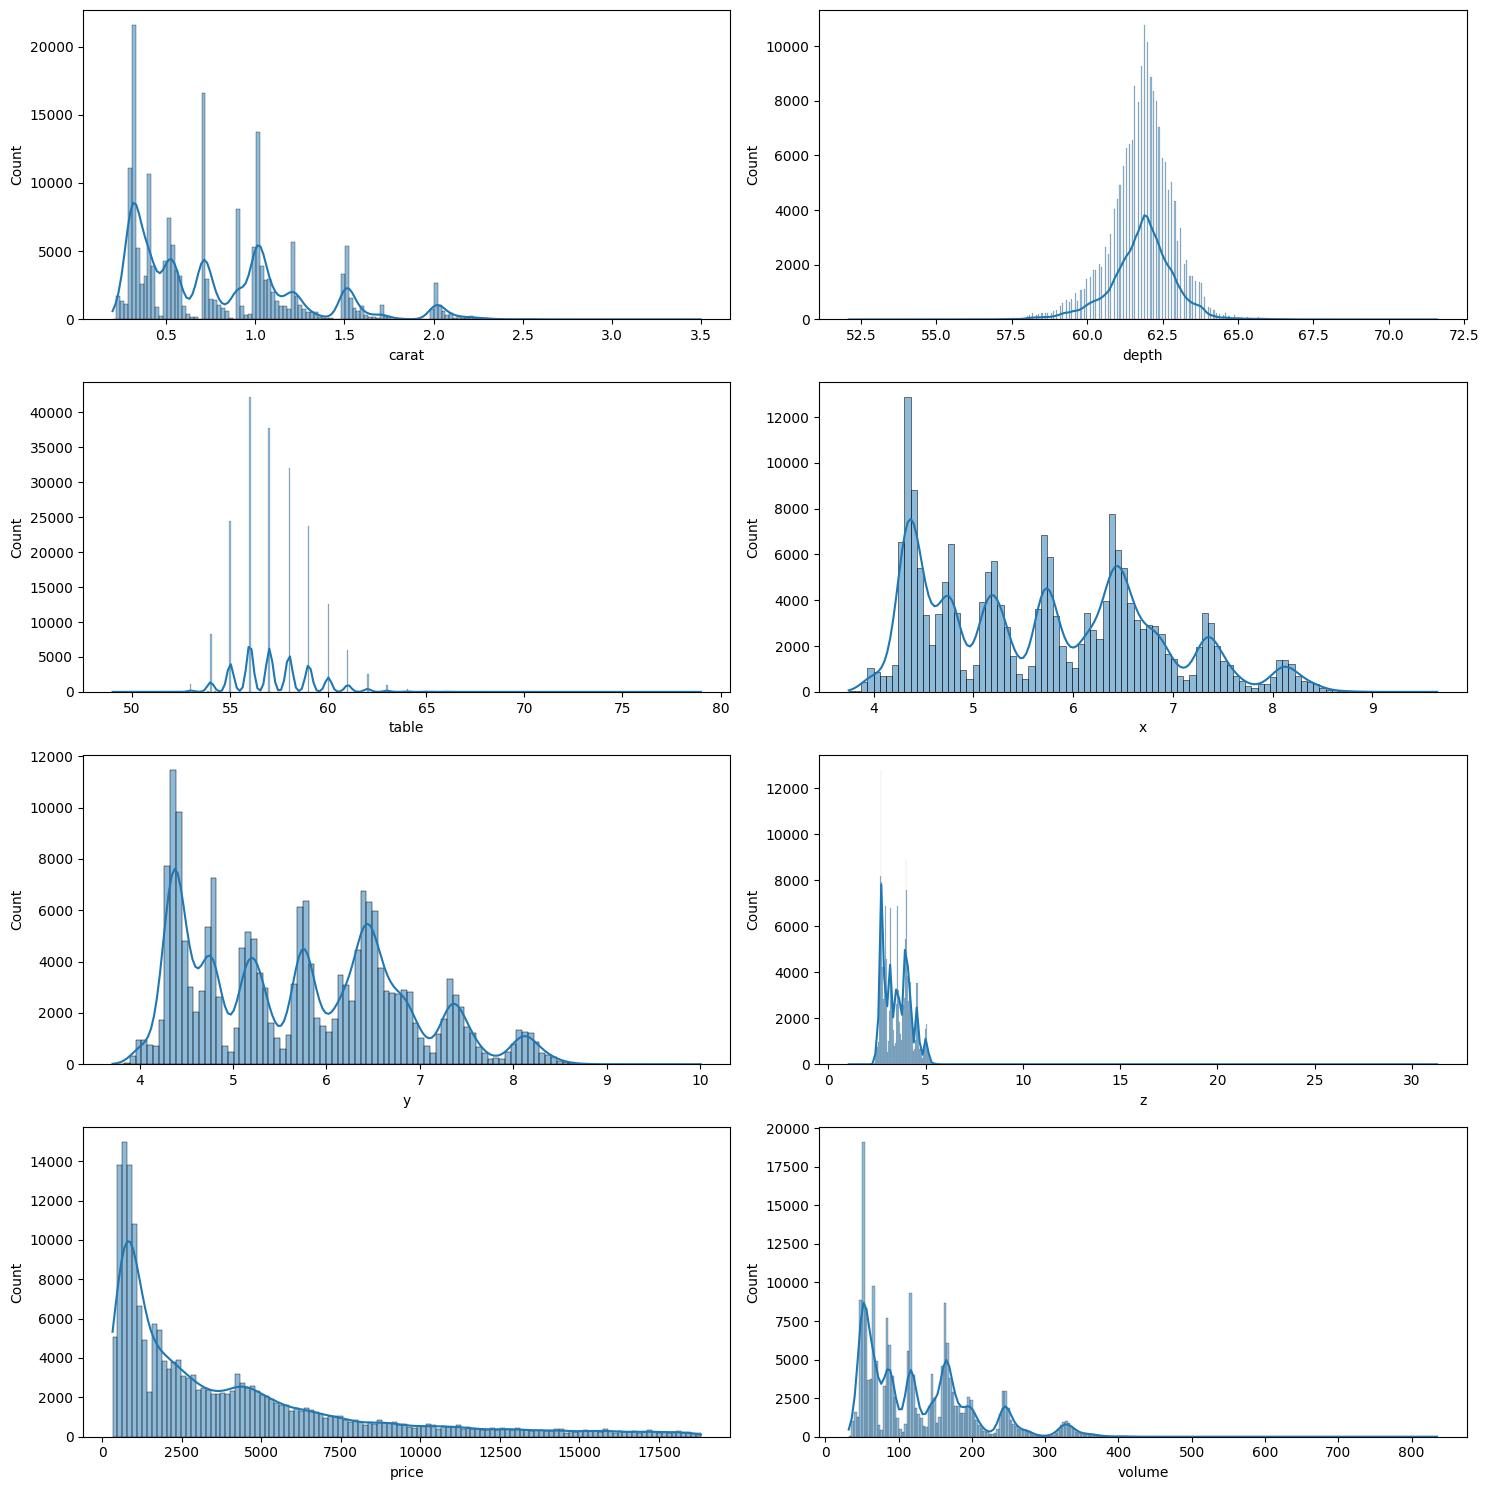

In [23]:
plt.figure(figsize=(15, 15))

for i in range(len(num_cols)):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=df, x= df[num_cols[i]], kde= True)

plt.tight_layout()
plt.show()

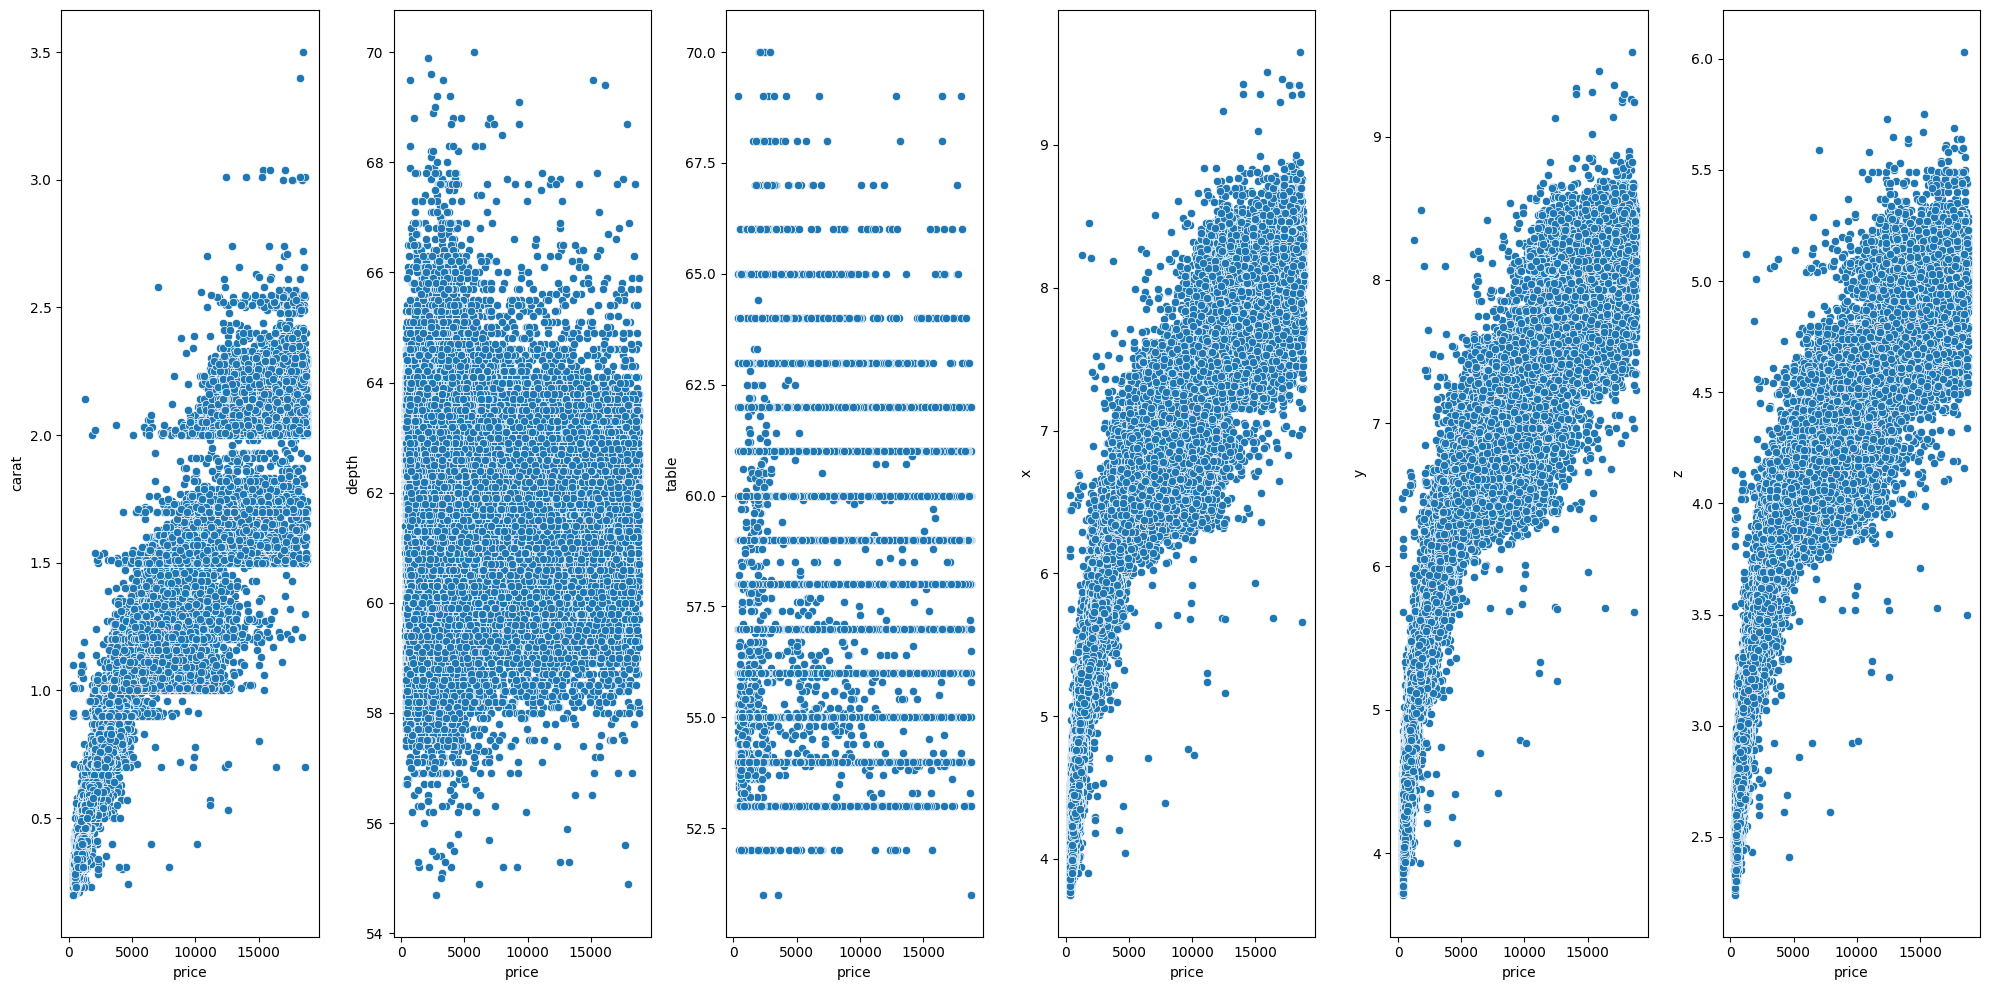

In [32]:
fig, axes = plt.subplots(nrows= 1, ncols= len(num_cols)-2, figsize= (20, 10))

for i, cols in enumerate(num_cols[:-2]):
    sns.scatterplot(data= df, x= df['price'], y= df[cols], ax= axes[i])

plt.tight_layout()
plt.show()

In [25]:
df2 = df

In [26]:
df2= df2[df2['y'] < 9.8]
df2= df2[(df2['z'] < 7) & (df2['z'] > 2)]
df2= df2[(df2['table'] < 75) & (df2['table'] > 50)]
df2= df2[(df2['depth'] < 71) & (df2['depth'] > 53.5)]

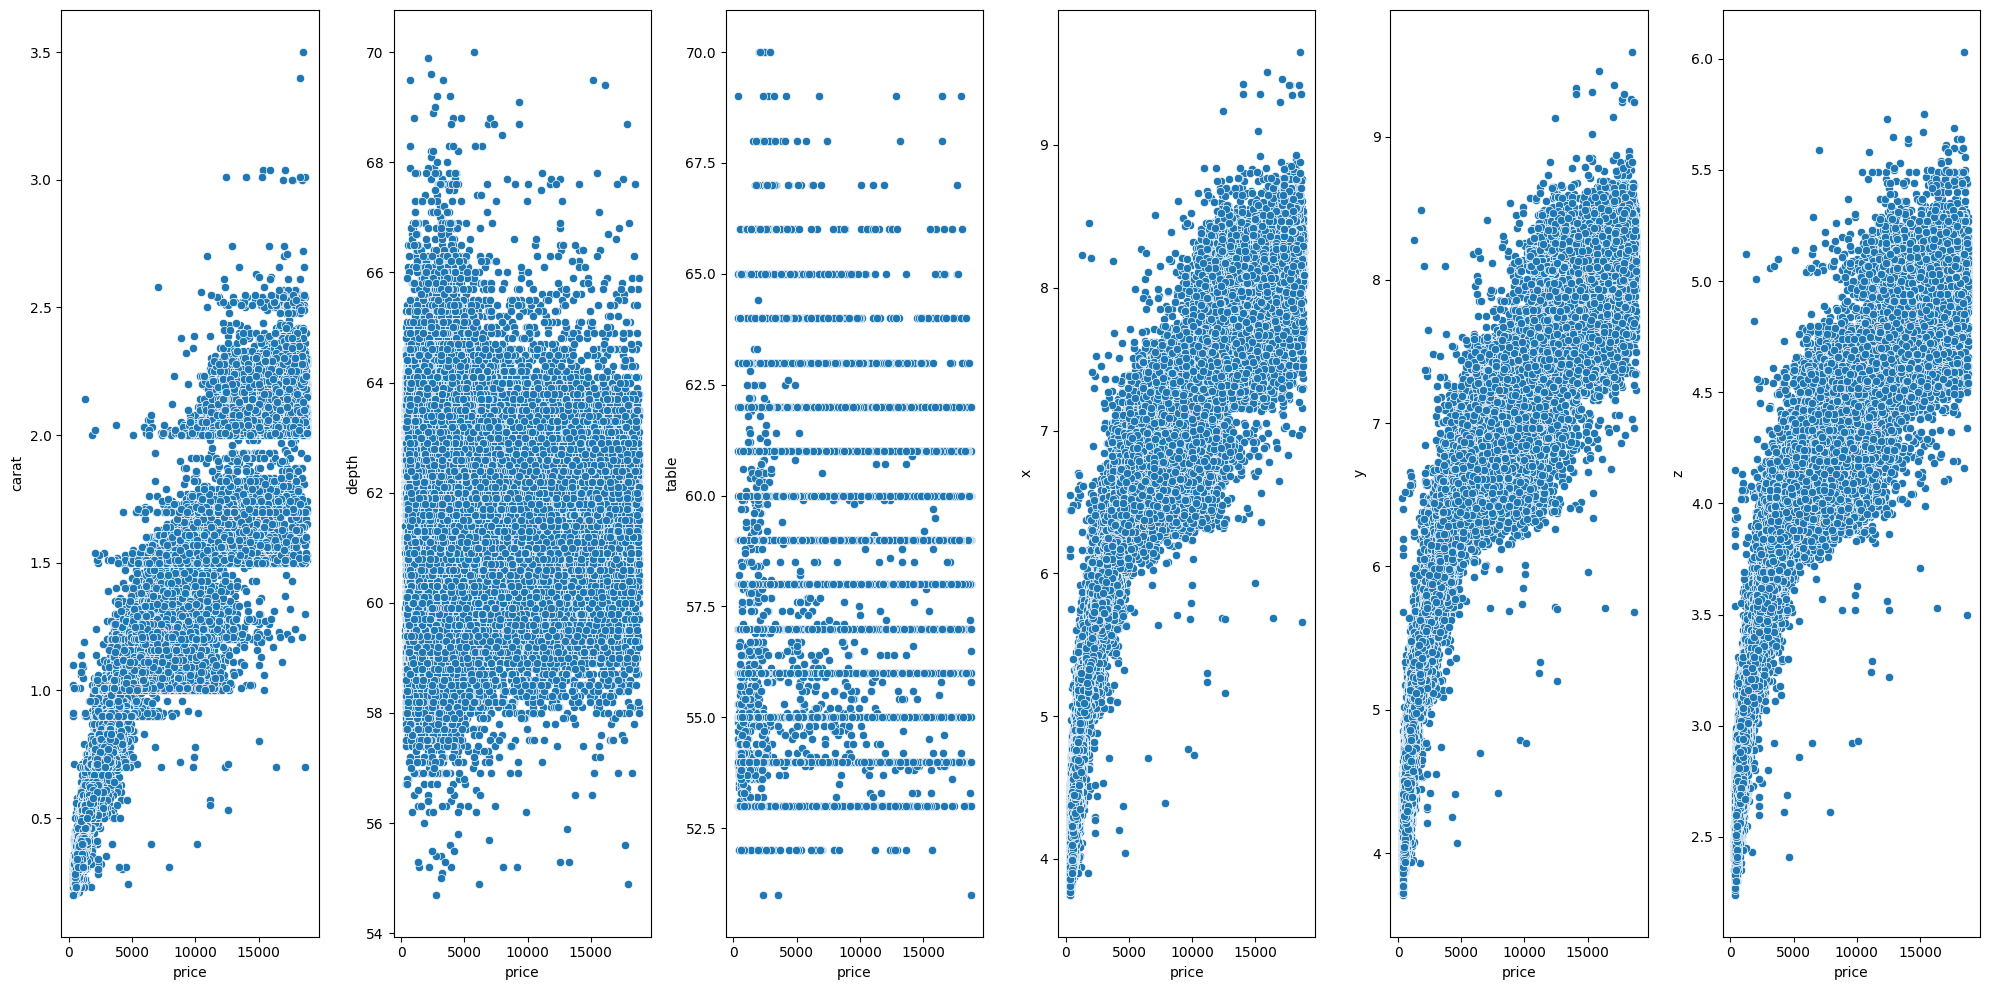

In [33]:
fig, axes = plt.subplots(nrows= 1, ncols= len(num_cols)-2, figsize= (20, 10))

for i, cols in enumerate(num_cols[:-2]):
    sns.scatterplot(data= df2, x= df2['price'], y= df2[cols], ax= axes[i])

plt.tight_layout()
plt.show()

In [28]:
df= df[df['y'] < 9.8]
df= df[(df['z'] < 7) & (df['z'] > 2)]
df= df[(df['table'] < 75) & (df['table'] > 50)]
df= df[(df['depth'] < 71) & (df['depth'] > 53.5)]

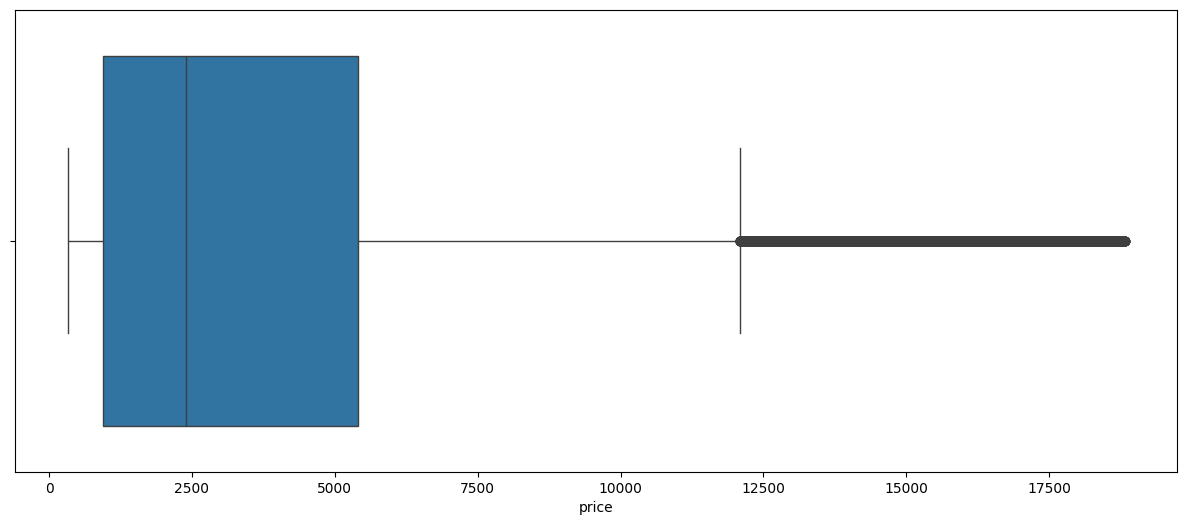

In [40]:
plt.figure(figsize=(15, 6))
sns.boxplot(data= df, x=df['price'])
plt.show()

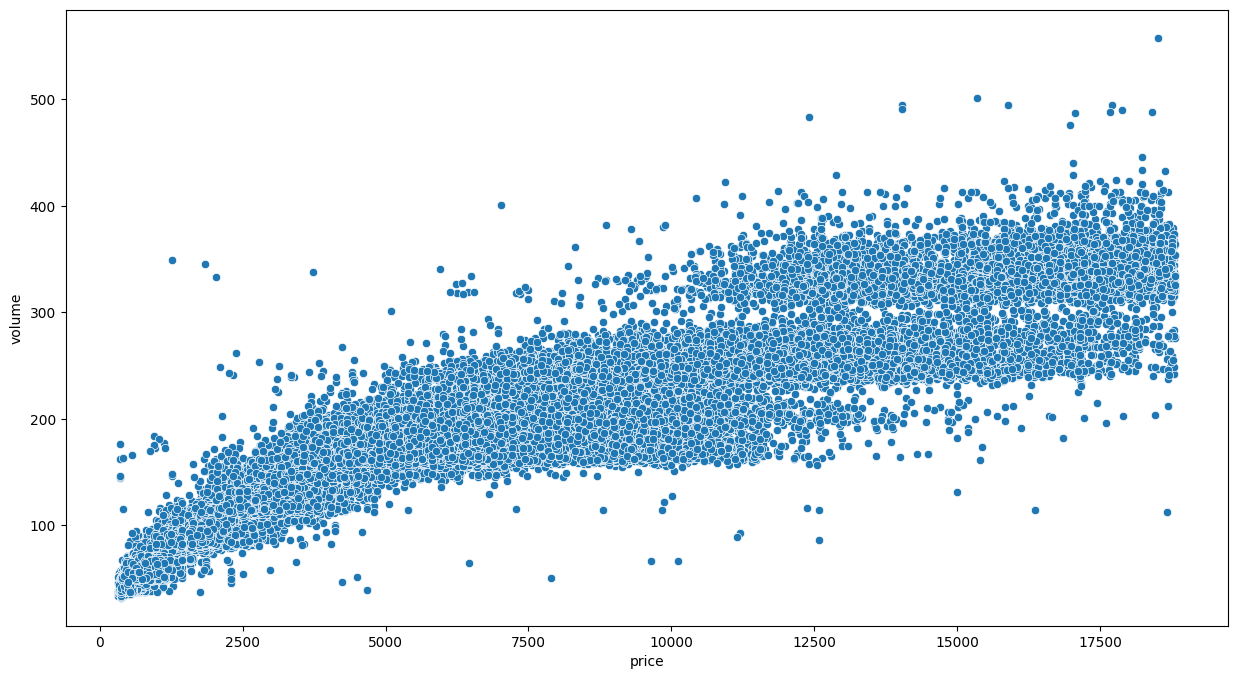

In [38]:
plt.figure(figsize= (15, 8))
sns.scatterplot(data= df, x= df['price'], y= df['volume'])
plt.show()

## Categorical Columns:

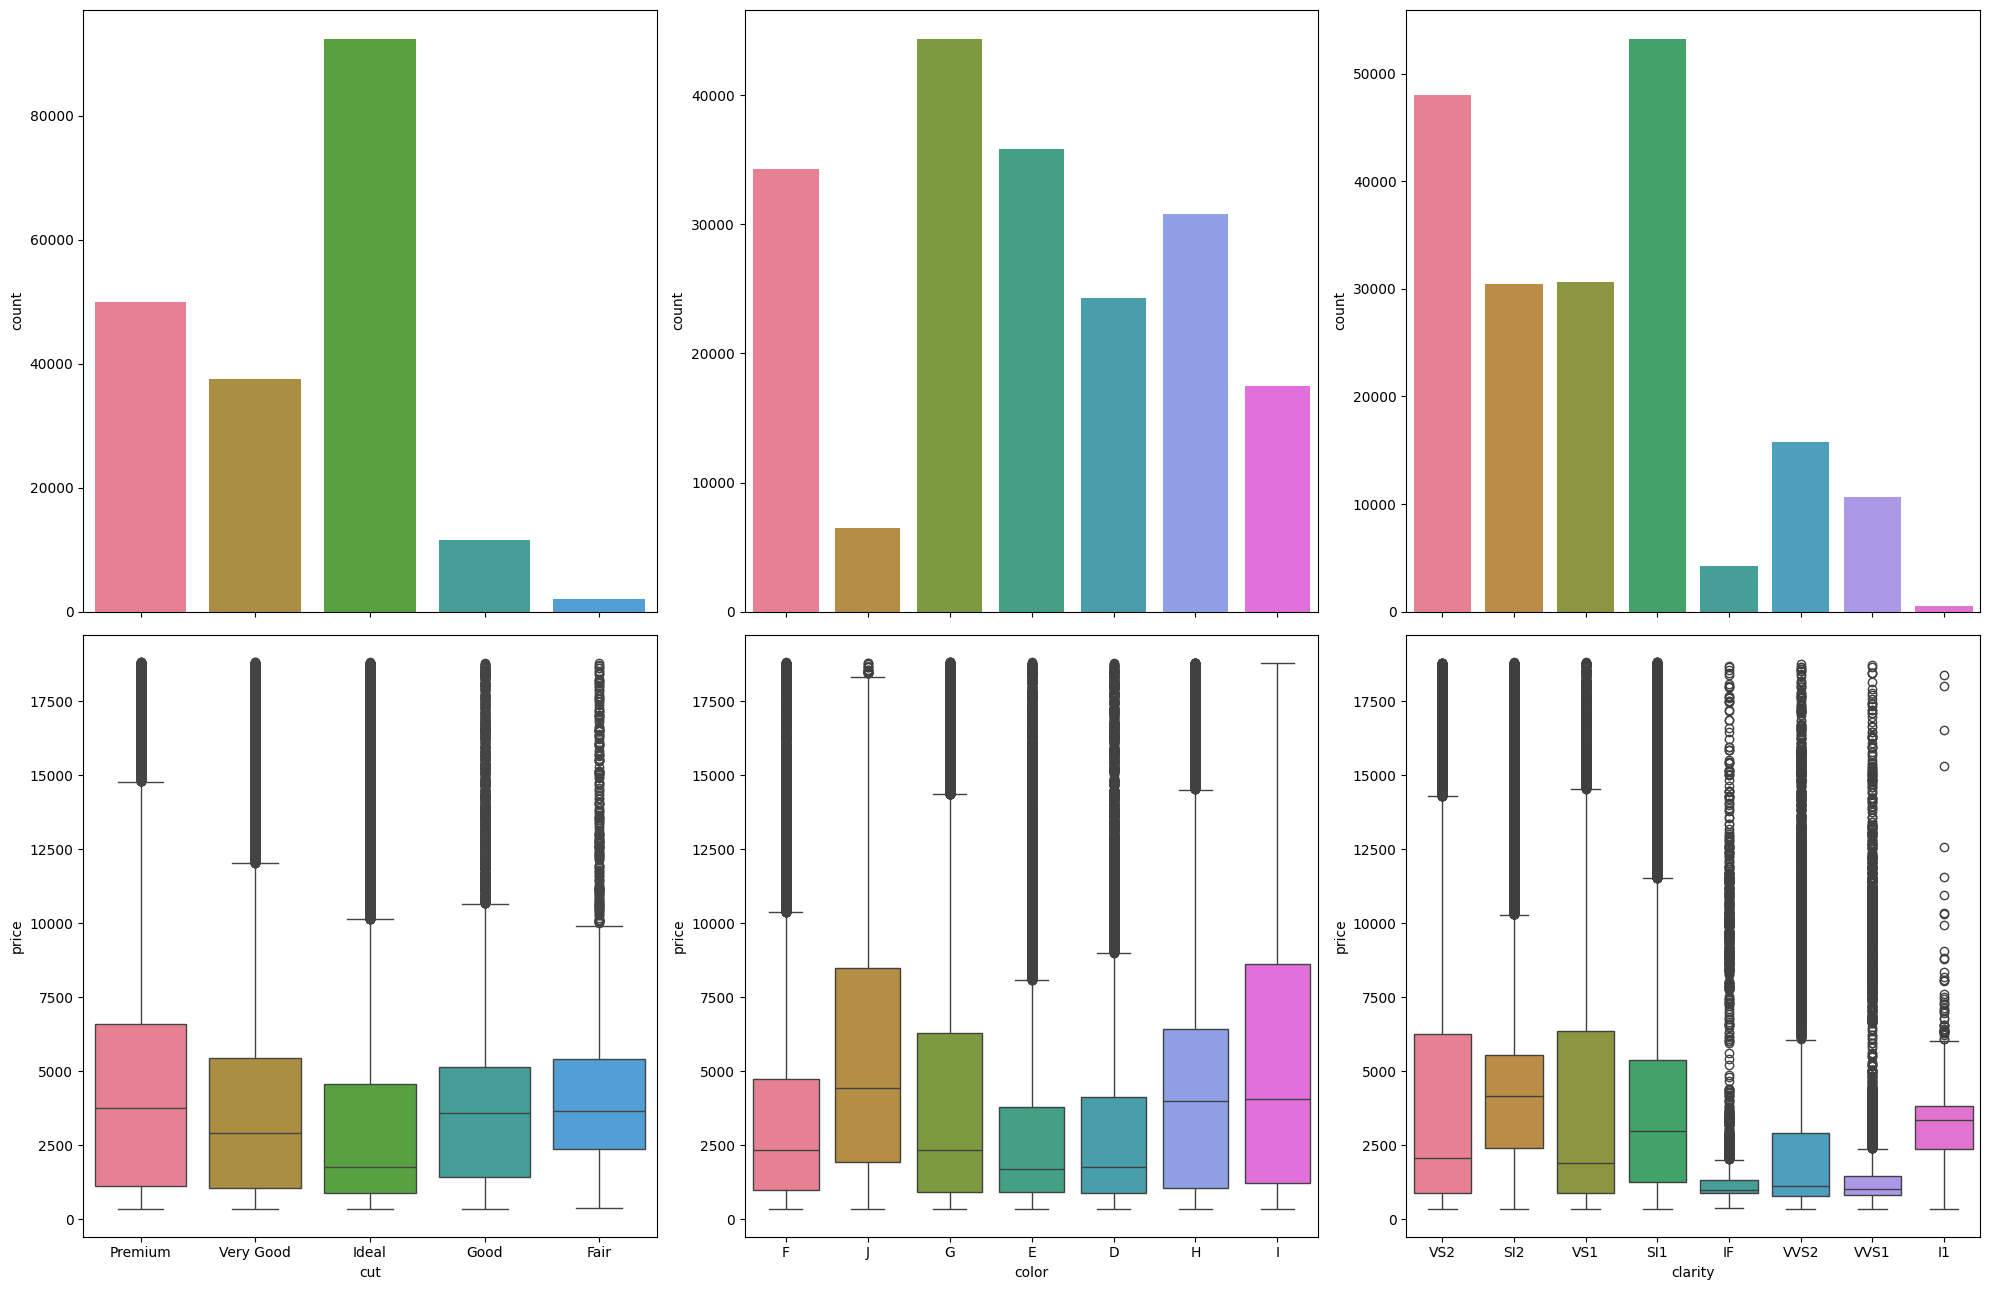

In [41]:
fig, axes = plt.subplots(nrows= 2, ncols= len(cat_cols), sharex= 'col', figsize= (20,13))

sns.set_palette('husl')

for i, cols in enumerate(cat_cols):
    sns.countplot(data= df, x= df[cols], ax= axes[0, i], hue= df[cols])
    sns.boxplot(data= df, x= df[cols], y= df['price'], ax= axes[1,i], hue= df[cols])

plt.tight_layout()
plt.show()

In [42]:
corr_matrix= df.corr(numeric_only=True)

In [43]:
np.fill_diagonal(corr_matrix.values, np.nan)

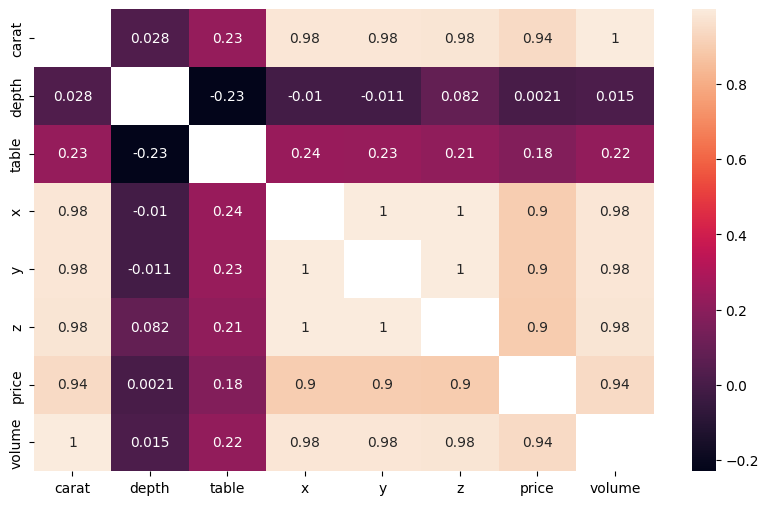

In [47]:
plt.figure(figsize= (10, 6))
sns.heatmap(corr_matrix, annot= True)
plt.show()

In [59]:
df2 = df.drop(columns= ['x', 'y', 'z'])

In [60]:
corr_matrix_2= df2.corr(numeric_only=True)

In [61]:
np.fill_diagonal(corr_matrix_2.values, np.nan)

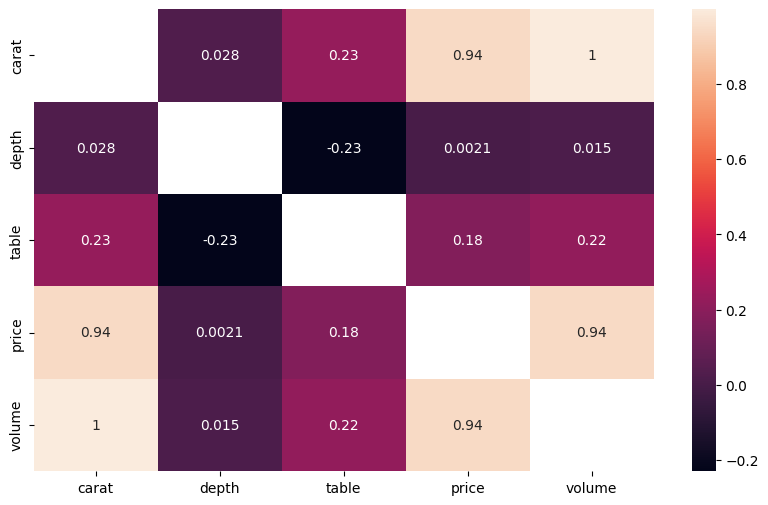

In [62]:
plt.figure(figsize= (10, 6))
sns.heatmap(corr_matrix_2, annot= True)
plt.show()

In [73]:
# df.to_csv('data/gemstone_cleaned.csv', index=False, header= True)